In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from fast_glcm import fast_glcm, fast_glcm_mean, fast_glcm_std, fast_glcm_contrast, fast_glcm_dissimilarity, fast_glcm_entropy, fast_glcm_homogeneity
from image_extractor import init_lut,apply_lut, hsv_filter, histogram_analysis, statistic_analysis, geometry_analysis, linear_fn, curved, CLAHE, seperate_chanel, hsv_contour_extract, select_feature

# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (99).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (2).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (32).JPG'


plt.rcParams['figure.dpi'] = 102.46

image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
# im_shape = np.shape(image)
lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)

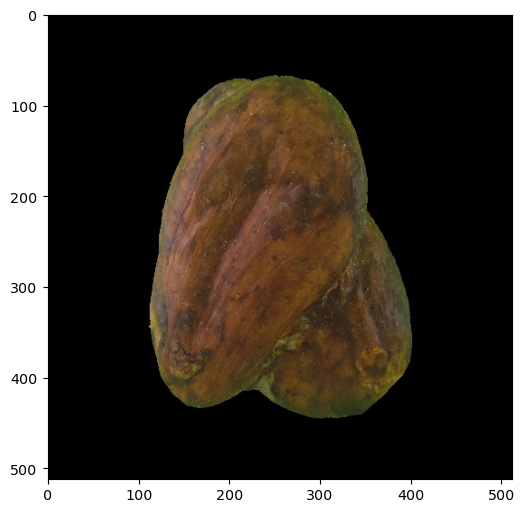

In [8]:
origin_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(origin_rgb)
plt.show()

In [9]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv = apply_lut(image_hsv, 2, lut2)   #tang brightness
image_hsv = apply_lut(image_hsv, 1, lut1)   #tang Sat
image_hsv = hsv_filter(image_hsv)

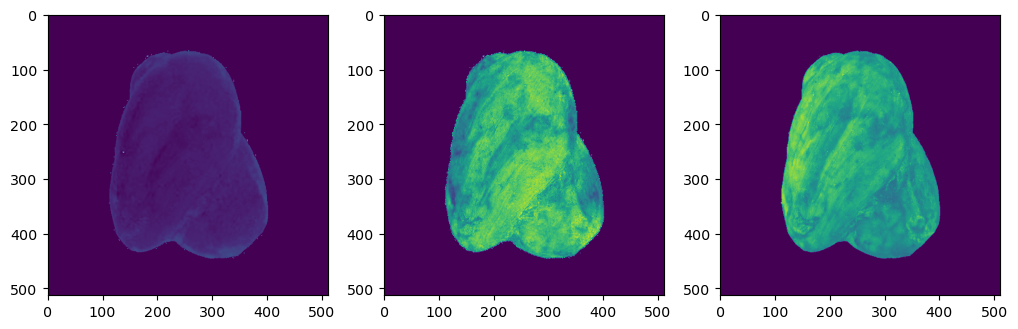

In [10]:
plt.rcParams["figure.figsize"] = (12,6)
h,s,v = seperate_chanel(image_hsv, plot=True)

(0,)
(347, 386, 25, 14, 155.0, 78.42640614509583, 13.592740058898926, 25.93131446838379, 87.30857849121094, 1.7713914646121578, 223.0, 12.093486785888672, 0.695067264573991, 0.44285714285714284, 2.5)
[[124.14285714285714 39.85142857142857 91.05428571428571]
 [78.0 50.0 28.0]
 [82.91078161334863 25.92220459877487 103.16634341008432]
 [0.9173192138615591 -0.7358400449207496 0.9606443302481223]
 [-1.0954510441993361 -1.1047387023253676 -1.0718663880083654]]
(307, 380, 15, 17, 61.5, 56.52691125869751, 12.77149486541748, 20.75489044189453, 24.038681030273438, 1.7033439384804512, 106.0, 9.552586555480957, 0.5801886792452831, 0.2411764705882353, 2.0615528128088303)
[[128.30588235294118 36.78431372549019 92.24705882352941]
 [83.0 49.0 29.0]
 [80.76036292930117 23.76667592134823 103.32487371179823]
 [0.9156862931958359 -0.831350330731282 0.9426470216384711]
 [-1.117449103718372 -1.154539163419199 -1.1070216884805604]]
(230, 371, 18, 22, 66.0, 87.39696824550629, 11.606850624084473, 25.5043582916

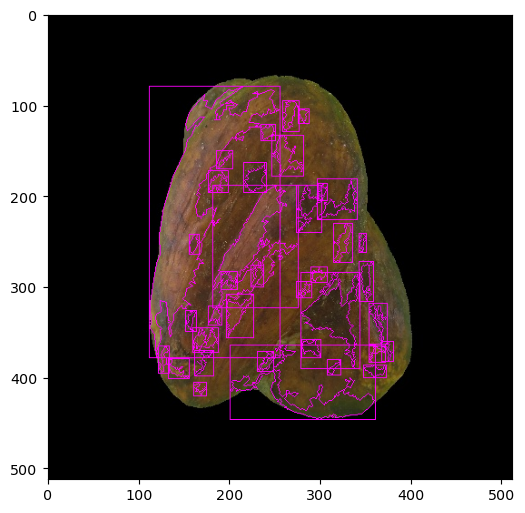

In [11]:
ctH, ctV = hsv_contour_extract(image_hsv)
print(np.shape(ctH))
for cnt in ctH:
    cv2.drawContours(origin_rgb, [cnt], -1, (0, 255, 255), 1)
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(0,255,255), 1)
    print(geometry_analysis(cnt))
    print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))

for cnt in ctV:
    cv2.drawContours(origin_rgb, [cnt], -1, (255, 0, 255), 1)
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(255,0,255), 1)
    print(geometry_analysis(cnt))
    print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))
plt.imshow(origin_rgb)
plt.show()